In [1]:
# Importing te libearies
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

dataset = pd.read_csv(r"C:\Users\J G TECH\Downloads\User_Data.csv")
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

#Spliting the dataset into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [2]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## KNN Algorithm

In [3]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=1)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [4]:
#Predicting the test set result
y_pred3 = classifier_knn.predict(x_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [5]:
cm= confusion_matrix(y_test, y_pred3)
cm

array([[64,  4],
       [10, 22]], dtype=int64)

In [6]:
cl= classification_report(y_test, y_pred3)
print(cl)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        68
           1       0.85      0.69      0.76        32

    accuracy                           0.86       100
   macro avg       0.86      0.81      0.83       100
weighted avg       0.86      0.86      0.86       100



In [7]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Choosing best k value

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
# print(k_values)
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(x)
X.mean(),X.std()

(-4.4408920985006264e-17, 1.0)

In [10]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [11]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=7)
    scores.append(np.mean(score))
print(scores)


[0.845043643591738, 0.8451300665456746, 0.8824215711693026, 0.8875637369285282, 0.8924898453029124, 0.8924898453029125, 0.9000086422953937, 0.8900267911157204, 0.8949528994901046, 0.8900267911157204, 0.9048483277158413, 0.902342062051681, 0.902342062051681, 0.902342062051681, 0.902342062051681, 0.902342062051681, 0.902342062051681, 0.902342062051681, 0.8998357963875206, 0.8998357963875206, 0.902342062051681, 0.902342062051681, 0.902342062051681, 0.902342062051681, 0.902342062051681, 0.8998357963875205, 0.8998357963875205, 0.8998357963875205, 0.8998357963875205, 0.8998357963875205]


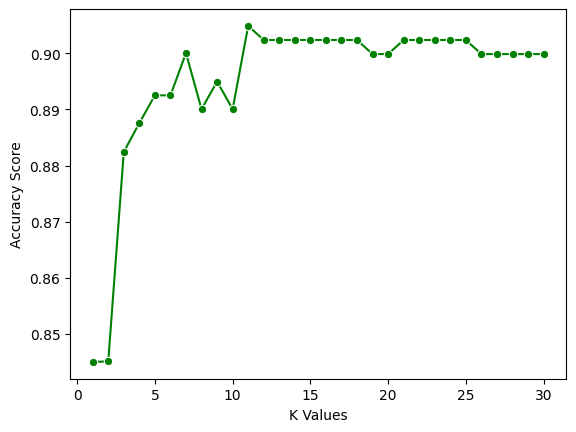

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = k_values, y = scores, marker ='o',color = 'green')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [13]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [14]:
from sklearn.metrics import accuracy_score
y_pred1 = knn.predict(x_train)
accuracy = accuracy_score(y_train,y_pred1)
print(accuracy)

0.8533333333333334


In [15]:
cl = classification_report(y_train,y_pred1)
print(cl)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       189
           1       0.85      0.73      0.79       111

    accuracy                           0.85       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.85      0.85      0.85       300



In [16]:
from sklearn.metrics import accuracy_score
y_pred5 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred5)
print(accuracy)

0.89


In [17]:
dataset_2 = dataset[['Gender','Age','EstimatedSalary']]
dataset_2 = pd.get_dummies(dataset_2)
XD = dataset_2

In [18]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB,BernoulliNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [19]:
XD

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,False,True
1,35,20000,False,True
2,26,43000,True,False
3,27,57000,True,False
4,19,76000,False,True
...,...,...,...,...
395,46,41000,True,False
396,51,23000,False,True
397,50,20000,True,False
398,36,33000,False,True


In [20]:
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(XD, y)
classifier_knn.score(XD, y)

0.8725

In [21]:
from sklearn.preprocessing import Normalizer
Scaler_N = Normalizer()
X = scaler.fit_transform(x)
X.mean(),X.std()

(-4.4408920985006264e-17, 1.0)

## Guassian Naive Bayes Algorithm

In [22]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB,BernoulliNB
classifier_nb = GaussianNB()  
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [23]:
# Predicting the Test set results  
y_pred2 = classifier_nb.predict(x_train) 
y_pred6 = classifier_nb.predict(x_test)

In [24]:
# Making the Confusion Matrix  
cm = confusion_matrix(y_train, y_pred2) 
print(cm)

[[174  15]
 [ 20  91]]


In [25]:
clr = classification_report(y_train,y_pred2)
clr_test = classification_report(y_test,y_pred6)
print(clr)
print(clr_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       189
           1       0.86      0.82      0.84       111

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



## Decision Tree Algorithm

In [26]:
# Fitting the decision tree classifier to the trainin test
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree
classifier_DT=DecisionTreeClassifier(criterion='gini', random_state=0)
classifier_DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
# Predicting the test set result
y_pred3 = classifier_DT.predict(x_train)
y_pred3

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

[Text(0.4519230769230769, 0.9615384615384616, 'x[0] <= 44.5\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(0.22435897435897437, 0.8846153846153846, 'x[1] <= 90500.0\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(0.11538461538461539, 0.8076923076923077, 'x[0] <= 36.5\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(0.08974358974358974, 0.7307692307692307, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.14102564102564102, 0.7307692307692307, 'x[1] <= 83500.0\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.11538461538461539, 0.6538461538461539, 'x[1] <= 67500.0\ngini = 0.153\nsamples = 60\nvalue = [55, 5]'),
 Text(0.08974358974358974, 0.5769230769230769, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.14102564102564102, 0.5769230769230769, 'x[1] <= 70500.0\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(0.11538461538461539, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 78500.0\ngini = 0.245\n

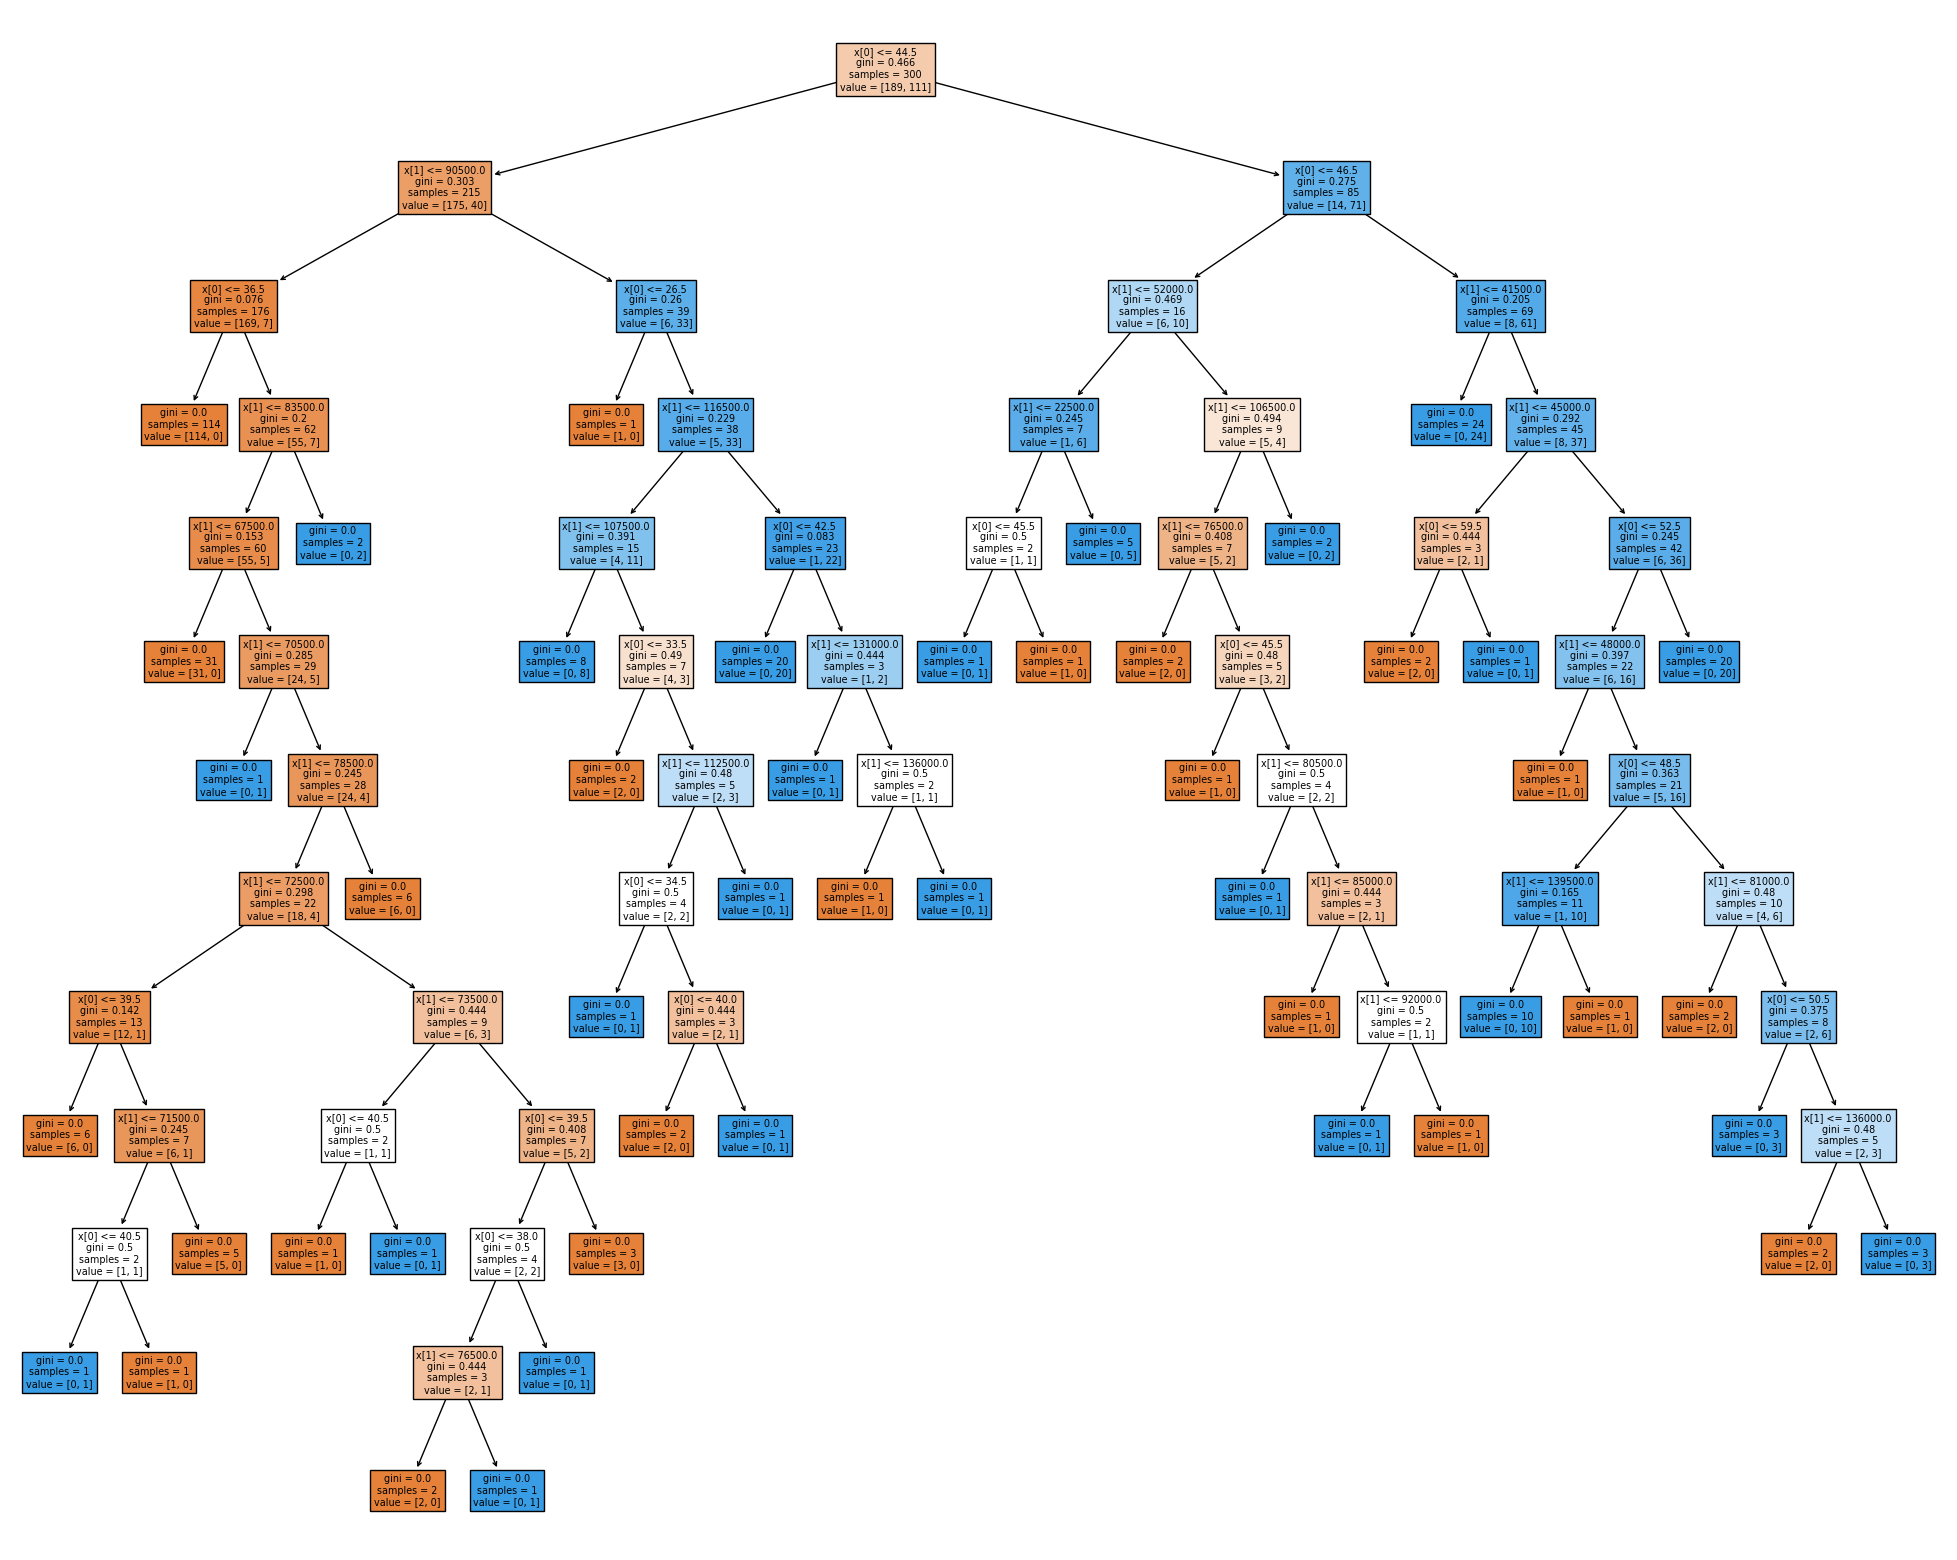

In [28]:
fig = plt.figure(figsize=(25,20))
plot_tree(classifier_DT,filled = True)

In [29]:
text_representation = tree.export_text(classifier_DT)
# print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [30]:
cm= confusion_matrix(y_train, y_pred3)
print(cm)
clr = classification_report(y_train, y_pred3)
print(clr)

[[189   0]
 [  0 111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       111

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [31]:
y_pred7 = classifier_DT.predict(x_test)
clr_test_DT = classification_report(y_test, y_pred7)
print(clr_test_DT)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



In [32]:
import os
os.getcwd()

'C:\\Users\\J G TECH\\ Data Science\\Untitled Folder'

In [33]:
# overfitting
training --> 100%
testing --> 90%
# underfitting
training --> 50%    80%
testiing --> 49% /51%    79%
# good fitting
training --> >90%
testing --> >90

SyntaxError: invalid syntax (2711774067.py, line 2)

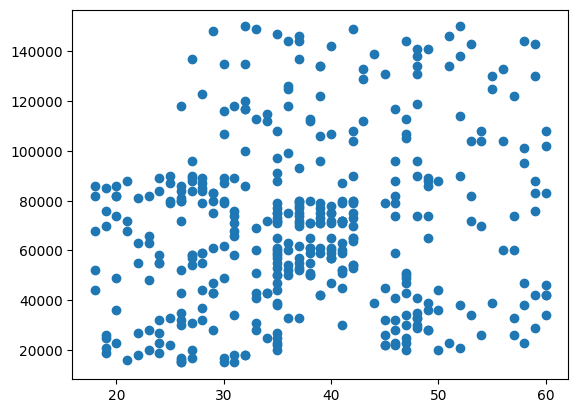

In [34]:
plt.scatter(x = dataset['Age'],y=dataset['EstimatedSalary'])
plt.show()

## Support Vector Machine

In [35]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier_svm = SVC(kernel='rbf', random_state=0)  # radial basil function
classifier_svm.fit(x_train, y_train) 

SVC(random_state=0)

In [36]:
#Predicting the test set result
y_pred4 = classifier_svm.predict(x_train)

In [37]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_train, y_pred4)
print(cm)
clr = classification_report(y_train, y_pred4)
print(clr)

[[180   9]
 [ 61  50]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       189
           1       0.85      0.45      0.59       111

    accuracy                           0.77       300
   macro avg       0.80      0.70      0.71       300
weighted avg       0.78      0.77      0.75       300



In [38]:
#Predicting the test set result  
y_pred8 = classifier_svm.predict(x_test)  
cm= confusion_matrix(y_test, y_pred8)
print(cm)
clr = classification_report(y_test, y_pred8)
print(clr)

[[66  2]
 [18 14]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        68
           1       0.88      0.44      0.58        32

    accuracy                           0.80       100
   macro avg       0.83      0.70      0.73       100
weighted avg       0.81      0.80      0.78       100



In [39]:
y_pred1.shape,y_pred2.shape,y_pred3.shape,y_pred4.shape

((300,), (300,), (300,), (300,))

In [40]:
y_pred5.shape,y_pred6.shape,y_pred7.shape,y_pred8.shape

((100,), (100,), (100,), (100,))

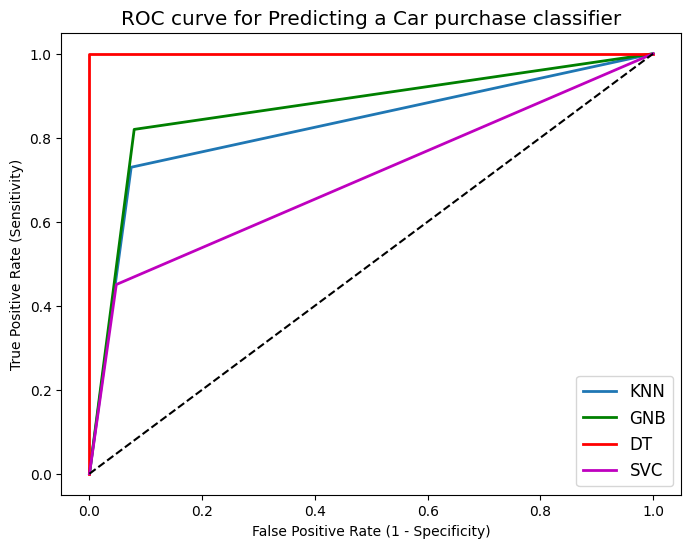

In [41]:
# plot ROC Curve for training data.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr1, tpr1, thresholds1 = roc_curve(y_train, y_pred1)
fpr2, tpr2, thresholds2 = roc_curve(y_train, y_pred2)
fpr3, tpr3, thresholds3 = roc_curve(y_train, y_pred3)
fpr4, tpr4, thresholds4 = roc_curve(y_train, y_pred4)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, linewidth=2,label = 'KNN')
plt.plot(fpr2, tpr2, linewidth=2,color = 'g',label = 'GNB')
plt.plot(fpr3, tpr3, linewidth=2,color = 'r',label = 'DT')
plt.plot(fpr4, tpr4, linewidth=2,color = 'm',label = 'SVC')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Car purchase classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

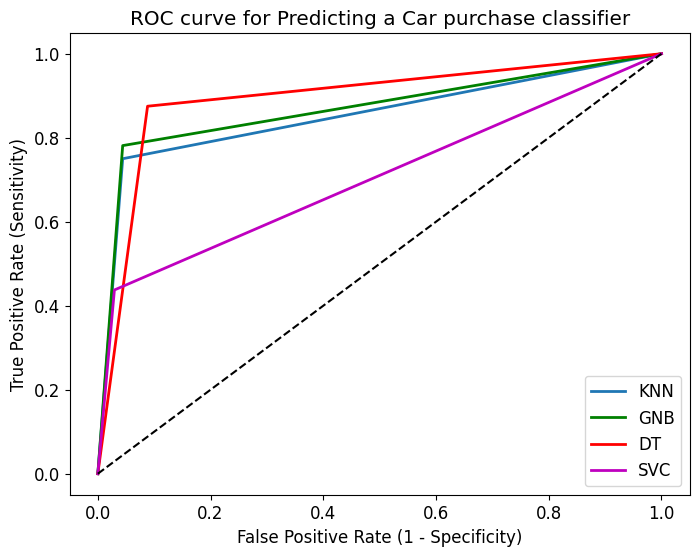

In [42]:
# plot ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred5)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred6)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred7)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred8)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, linewidth=2,label = 'KNN')
plt.plot(fpr2, tpr2, linewidth=2,color = 'g',label = 'GNB')
plt.plot(fpr3, tpr3, linewidth=2,color = 'r',label = 'DT')
plt.plot(fpr4, tpr4, linewidth=2,color = 'm',label = 'SVC')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Car purchase classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

In [4]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [5]:
# reading the data set
data = pd.read_csv(r"C:\Users\J G TECH\Downloads\Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [7]:
data.shape

(440, 8)

In [8]:
# statistic of the data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


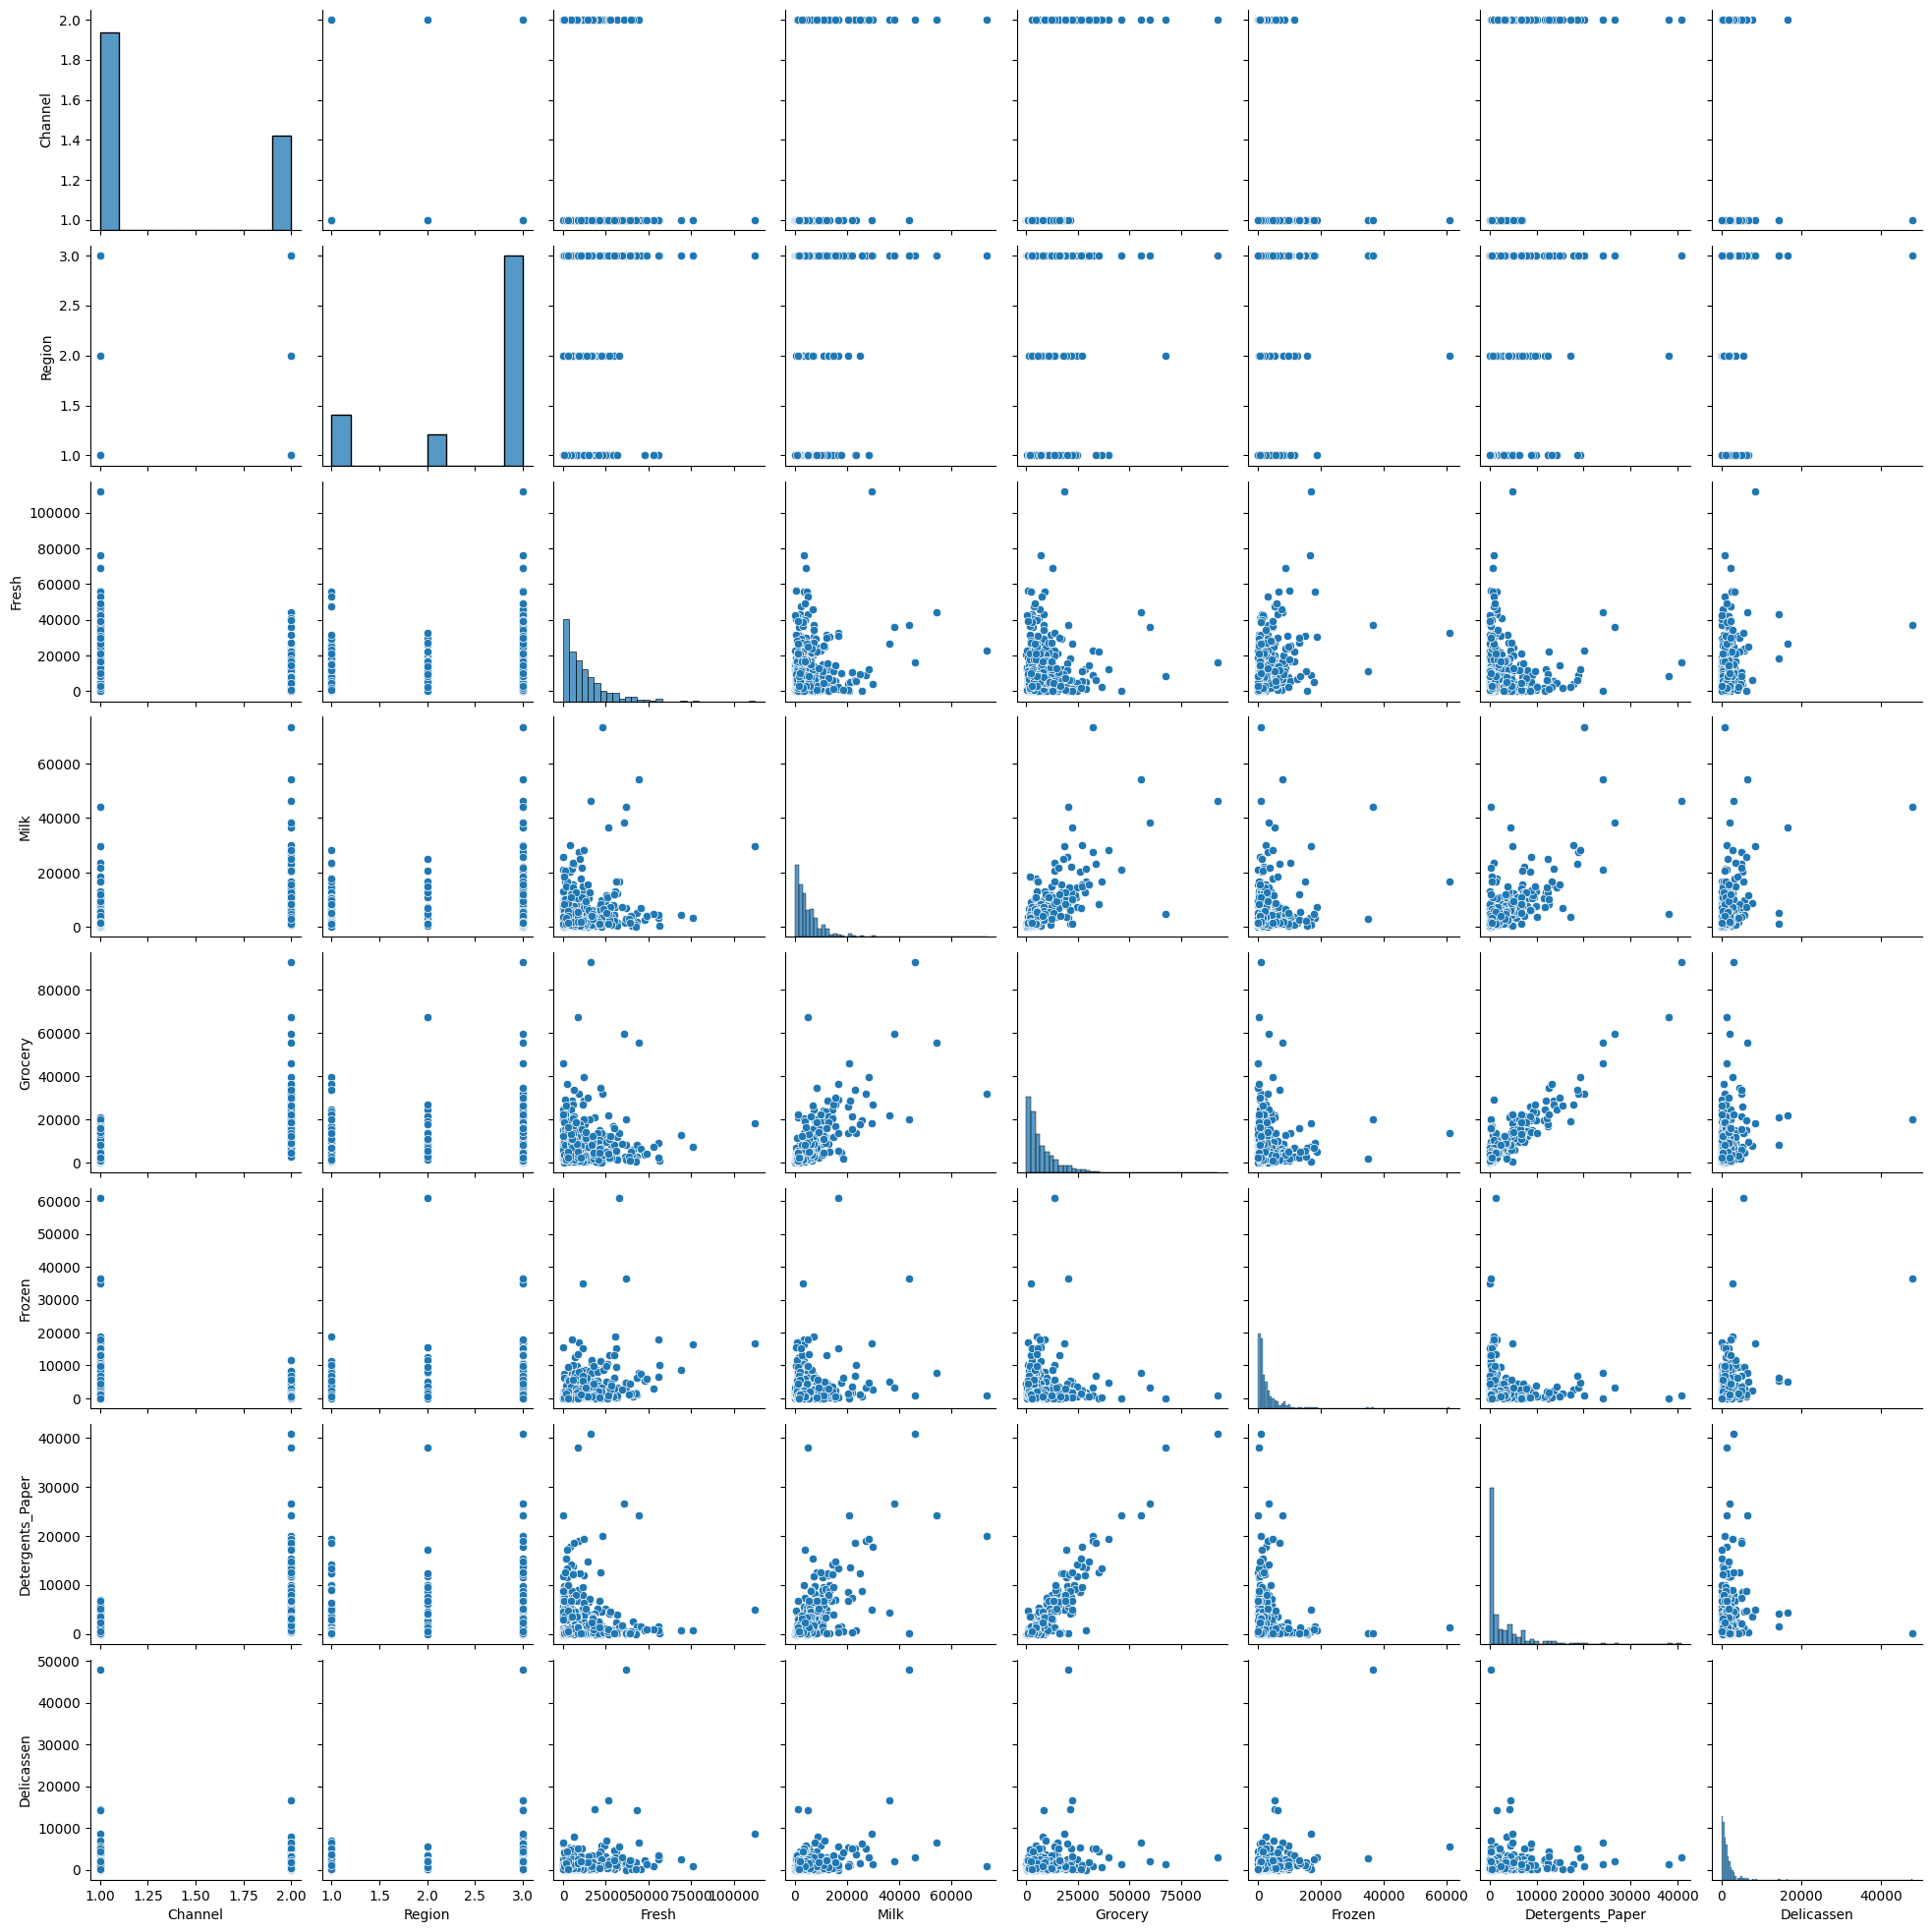

In [10]:
import seaborn as sns
sns.pairplot(data)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random',n_init = 'auto')
kmeans.fit(data_scaled)

KMeans(init='random', n_clusters=2, n_init='auto')

In [13]:
kmeans.inertia_

2599.38555935614

Text(0, 0.5, 'SSE')

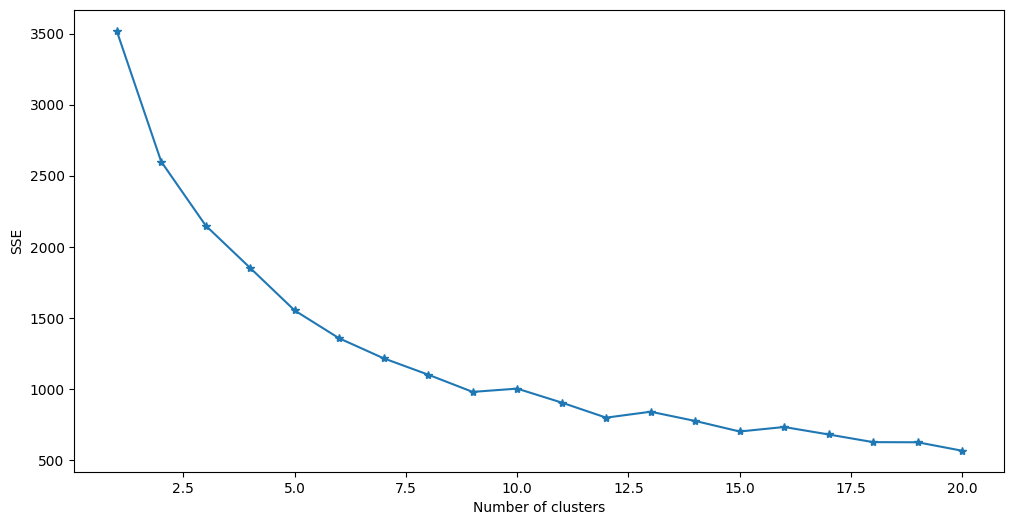

In [17]:
#fitting the multiple k-means algorithms and starting the values in an empty list
SSE = []
for k in range(1,21):
    kmeans = KMeans(n_clusters = k, init='random',n_init = 'auto')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
#print(SSE)
#converting the result into the dataframe
frame = pd.DataFrame({'Cluster':range(1,21), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [18]:
# k means using a clusters and k-means++ initilization
kmeans = KMeans(n_clusters = 6, init='random',n_init = 'auto')
kmeans.fit(data_scaled)
print(kmeans.inertia_)
y_pred = kmeans.fit_predict(data_scaled)
np.unique(y_pred)

1348.2786511995857


array([0, 1, 2, 3, 4, 5])

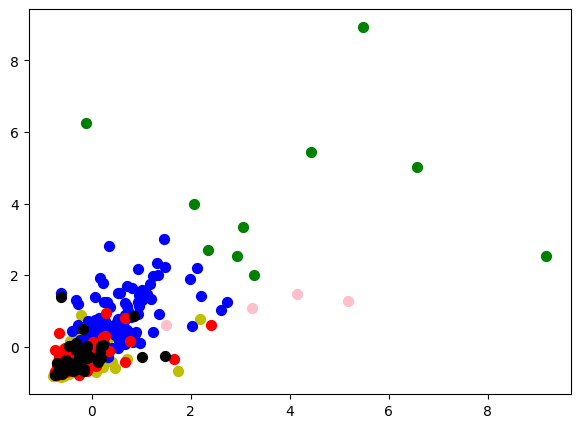

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(data_scaled[y_pred == 0, 3], data_scaled[y_pred == 0, 4], s = 50, c = 'pink')
plt.scatter(data_scaled[y_pred == 1, 3], data_scaled[y_pred == 1, 4], s = 50, c = 'y')
plt.scatter(data_scaled[y_pred == 2, 3], data_scaled[y_pred == 2, 4], s = 50, c = 'g')
plt.scatter(data_scaled[y_pred == 3, 3], data_scaled[y_pred == 3, 4], s = 50, c = 'b')
plt.scatter(data_scaled[y_pred == 4, 3], data_scaled[y_pred == 4, 4], s = 50, c = 'r')
plt.scatter(data_scaled[y_pred == 5, 3], data_scaled[y_pred == 5, 4], s = 50, c = 'k')

In [20]:
frame = pd.DataFrame(data_scaled)
frame['Cluster'] = y_pred
print(frame.head())
print(frame['Cluster'].value_counts())

          0         1         2         3         4         5         6  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367 -0.043569   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136  0.086407   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536  0.133232   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144 -0.498588   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859 -0.231918   

          7  Cluster  
0 -0.066339        3  
1  0.089151        3  
2  2.243293        3  
3  0.093411        1  
4  1.299347        3  
Cluster
1    164
3    124
4     85
5     53
2     10
0      4
Name: count, dtype: int64


In [21]:
frame[frame['Cluster'] == 1]

,0,1,2,3,4,5,6,7,Cluster
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
8,-0.690297,0.590668,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079,1
15,-0.690297,0.590668,-0.138313,-0.635143,-0.435116,-0.551629,-0.402629,-0.395069,1
17,-0.690297,0.590668,-0.484788,0.048933,-0.528665,-0.460479,-0.527355,1.048362,1
19,-0.690297,0.590668,-0.334071,-0.447812,0.159362,-0.495536,-0.076325,-0.363474,1
...,...,...,...,...,...,...,...,...,...
432,-0.690297,0.590668,0.721661,-0.628632,-0.336826,-0.578025,-0.326197,-0.401104,1
433,-0.690297,0.590668,-0.793029,-0.349738,-0.680366,-0.315711,-0.530295,-0.026934,1
434,-0.690297,0.590668,0.374473,-0.254242,0.004501,-0.491618,-0.107192,-0.243839,1
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


In [22]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

## DBscan

In [23]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN

In [24]:
df = pd.read_csv(r"C:\Users\J G TECH\AppData\Local\Microsoft\Windows\INetCache\IE\TA2P48M3\Mall_Customers[1].csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
df.rename(columns={'Annual Income (k$)':'Income',
                  'Spending Score (1-100)':'Spend_Score'},inplace=True)

In [28]:
df=df.drop(['CustomerID'],axis=1)

<Axes: >

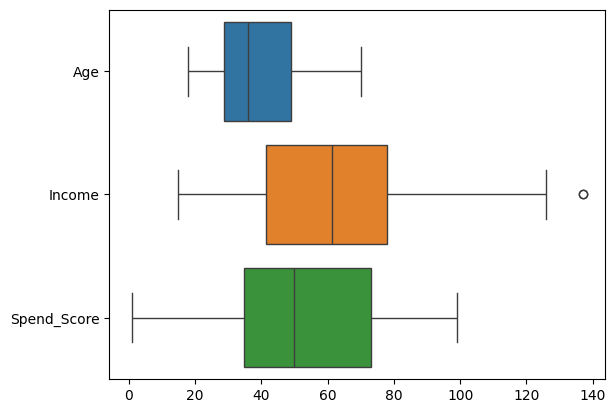

In [29]:
import seaborn as sns
sns.boxplot(df,orient='h')

In [30]:
df.head()

,Gender,Age,Income,Spend_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [31]:
x = df.iloc[:,[2,3]].values

In [32]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 8, min_samples=6, metric='euclidean')

In [33]:
model=db.fit(x)

In [34]:
label=model.labels_
label

array([ 1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4, -1,  4,  3,  4, -1, -1, -1,  4, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [35]:
from sklearn import metrics
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_] = True
#Calculating the number of clusters
n_clusters = len(set(label))- (1 if -1 in label else 0)
print('No. of clusters:',n_clusters)

No. of clusters: 5


In [36]:
x_selected_0 = x[y_means == 0, 0]
x_selected_1 = x[y_means == 0, 1]

NameError: name 'y_means' is not defined

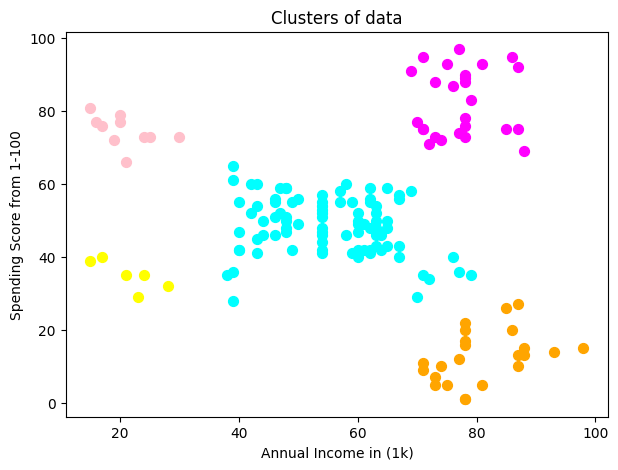

In [37]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score
result = silhouette_score(x,label)

In [39]:
print(result)

0.28838622272538006


In [40]:
!pip install tensorflow>=2.14.0
!pip install keras==2.14.0

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement keras==2.14.0 (from versions: none)
ERROR: No matching distribution found for keras==2.14.0


In [41]:
import tensorflow
import keras
tensorflow.__version__,keras.__version__

('2.17.0', '3.4.1')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv(r"C:\Users\J G TECH\AppData\Local\Microsoft\Windows\INetCache\IE\47FN4VLF\Churn_Modelling[1].csv")  
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [43]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
X = dataset.iloc[:, 3:13].values  
y = dataset.iloc[:, 13].values 

In [47]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [48]:
#Encoding Categorical Variable Gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,1] = np.array(LE1.fit_transform(X[:,1]))
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [49]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])],remainder="passthrough")
multi_x = np.array(ct.fit_transform(X))
multi_x[[0]]

array([[1.0, 0.0, 0.0, 1.0, 0.0, 619, 42, 2, 0.0, 1, 1, 1, 101348.88]],
      dtype=object)

In [53]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
#Initialising ANN
import tensorflow as tf
import keras   
from keras.models import Sequential  
from keras.layers import Dense 
ann = Sequential()

In [57]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [58]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [59]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [60]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [61]:
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=50,epochs = 30)

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4441 - loss: 0.7835
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7859 - loss: 0.5172
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7909 - loss: 0.4802
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7948 - loss: 0.4559
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7947 - loss: 0.4465
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7945 - loss: 0.4333
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7937 - loss: 0.4305
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8077 - loss: 0.4092
Epoch 9/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8093 - loss: 0.4074
Epoch 10/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8158 - loss: 0.3985
Epoch 11/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8200 - loss: 0.4028
Epoch 12/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [62]:
X_train.shape, Y_train.shape

((8000, 10), (8000,))

In [63]:
#CreditScore	Geography	Gender	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary
#Predicting result for Single Observation
print(ann.predict(sc.transform([[650,0,1,25,2,180000,3,1,1,590000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
[[ True]]


In [64]:
#Saving created neural network
ann.save("ANN1.keras")

In [65]:
y_pred = ann.predict(X_test)  

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [66]:
y_pred = (y_pred > 0.5) 

In [67]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(Y_test, y_pred)  
cm

array([[1500,   95],
       [ 204,  201]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
clr = classification_report(Y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.50      0.57       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [69]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (50, 6)                     │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (50, 6)                     │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (50, 1)                     │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 232 (932.00 B)

In [79]:
#a. Load the dataset
import tensorflow as tf  
# from keras.preprocessing.image import ImageDataGenerator  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

In [80]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 38s 0us/step


In [81]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Exploratatory Data Analysis

In [82]:
# 1. Function for showing images
def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(6,6))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

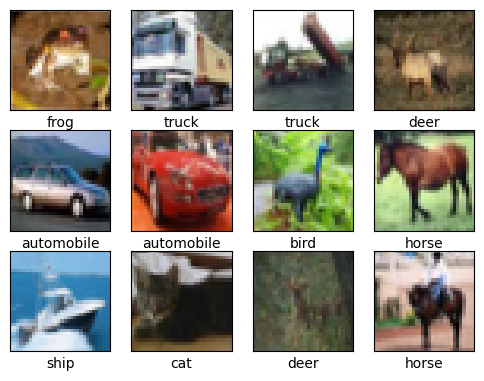

In [83]:
# Visualize some sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
show_images(train_images, class_names, train_labels)

In [84]:
from tensorflow.keras.utils import to_categorical
 # Data normalization
max_pixel_value = 255
train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value
# One-hot encode the labels
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))
train_labels.shape,test_labels.shape

((50000, 10), (10000, 10))

## Model Architecture

In [85]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
 # Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)
 
# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [86]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [87]:
from tensorflow.keras.metrics import Precision, Recall
BATCH_SIZE = 32
EPOCHS = 15
METRICS = metrics=['accuracy', Precision(name='precision'),Recall(name='recall')]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = METRICS)
 
# Train the model
training_history = model.fit(train_images, train_labels, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.3986 - loss: 1.6546 - precision: 0.6419 - recall: 0.1609 - val_accuracy: 0.5833 - val_loss: 1.1838 - val_precision: 0.7384 - val_recall: 0.4233
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6201 - loss: 1.0858 - precision: 0.7624 - recall: 0.4663 - val_accuracy: 0.6460 - val_loss: 1.0217 - val_precision: 0.7913 - val_recall: 0.4801
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6750 - loss: 0.9373 - precision: 0.7918 - recall: 0.5546 - val_accuracy: 0.6749 - val_loss: 0.9502 - val_precision: 0.7924 - val_recall: 0.5541
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7161 - loss: 0.8215 - precision: 0.8134 - recall: 0.6171 - val_accuracy: 0.6843 - val_loss: 0.9104 - val_precision: 0.7762 - val_recall: 0.5952
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7414 - loss: 0.7469 - precision: 0.8258 - recall: 0.6576 - val_accuracy: 0

In [94]:
train_images.shape,train_labels.shape

((50000, 32, 32, 3), (50000, 10))

In [95]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

## Evaluate the model

In [96]:
import matplotlib.pyplot as plt
    
def show_performance_curve(training_result, metric, metric_label):
    
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_idx = np.argwhere(np.isclose(train_perf, 
                                                validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]
    
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label = 'val_'+str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
    plt.annotate(f'Optimal Value: {intersection_value:.4f}',
             xy=(intersection_idx, intersection_value),
             xycoords='data',
             fontsize=10,
             color='green')
                 
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

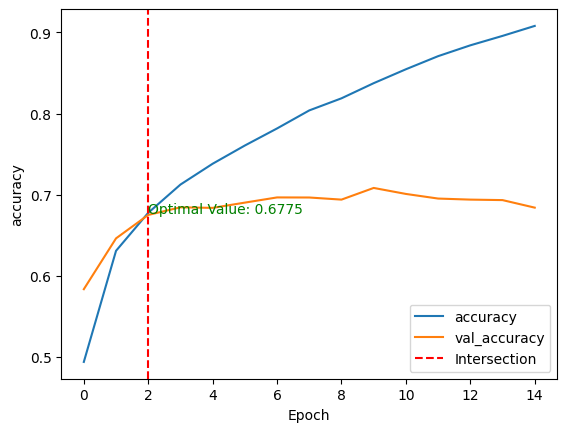

In [97]:
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
show_performance_curve(training_history, 'accuracy', 'accuracy')

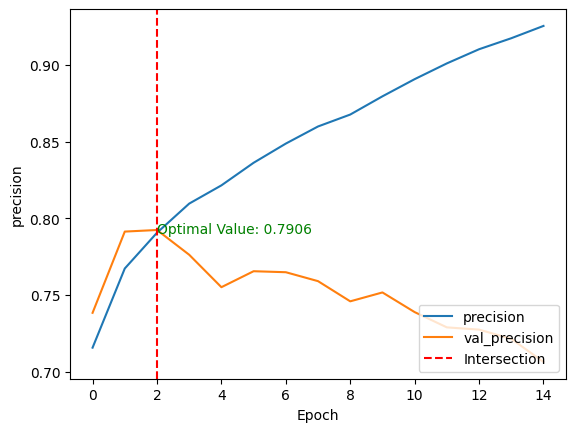

In [98]:
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#show_performance_curve(training_history, 'accuracy', 'accuracy')
#show_performance_curve(training_history, 'recall', 'recall')
show_performance_curve(training_history, 'precision', 'precision')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


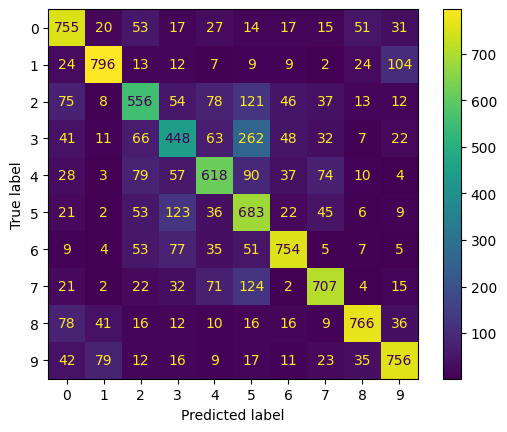

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_images)
 
# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)
 
# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(test_labels, axis=1)
 
# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)
 
# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
 
# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [102]:
#Steps to install NLTK and its data:
! pip install spacy

#Install NLTK: run in terminal :
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [104]:
# Import modules
import numpy as np
import pandas as pd
import nltk
import spacy

#Set seed for reproducibility
np.random.seed(5)


movies_df = pd.read_csv(r"C:\Users\J G TECH\AppData\Local\Microsoft\Windows\INetCache\IE\TA2P48M3\movies[1].csv")
print("Number of movies loaded: %s " % (len(movies_df)))

print(movies_df.head())

Number of movies loaded: 99 
   rank                     title                                    genre  \
0     0             The Godfather                   [u' Crime', u' Drama']   
1     1  The Shawshank Redemption                   [u' Crime', u' Drama']   
2     2          Schindler's List  [u' Biography', u' Drama', u' History']   
3     3               Raging Bull    [u' Biography', u' Drama', u' Sport']   
4     4                Casablanca        [u' Drama', u' Romance', u' War']   

                                           wiki_plot  \
0  On the day of his only daughter's wedding, Vit...   
1  In 1947, banker Andy Dufresne is convicted of ...   
2  In 1939, the Germans move Polish Jews into the...   
3  In a brief scene in 1964, an aging, overweight...   
4  It is early December 1941. American expatriate...   

                                           imdb_plot  
0  In late summer 1945, guests are gathered for t...  
1  In 1947, Andy Dufresne (Tim Robbins), a banker...  


In [105]:
# Combine wiki_plot and imdb_plot into a single coloumn
movies_df["plot"] = movies_df["wiki_plot"].astype(str) + "\n" + movies_df["imdb_plot"].astype(str)

#Inspects the new Dataframe
movies_df.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [106]:
movies_df["plot"][0]

'On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson   Johnny Fontane  Johnny Fontane  , a popul

In [108]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\J G
[nltk_data]     TECH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [110]:
# Tokenize a paragraph into sentences and store in sent_tokenized
sentence_tokenized = [sent for sent in nltk.sent_tokenize("""'On the day of his only daughter\'s wedding, 
                                                             Vito Corleone hears requests in his role as the Godfather,
                                                             the Don of a New York crime family. Vito\'s youngest son, 
                                                            Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception.
                                                            Vito\'s godson Johnny Fontane, a popular singer,""")]
print(sentence_tokenized)

["'On the day of his only daughter's wedding, \n                                                             Vito Corleone hears requests in his role as the Godfather,\n                                                             the Don of a New York crime family.", "Vito's youngest son, \n                                                            Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception.", "Vito's godson Johnny Fontane, a popular singer,"]


In [114]:
print('Word Tokenize:')
words_tokenized = [word for word in nltk.word_tokenize(sentence_tokenized[0])]
print(words_tokenized)

Word Tokenize:
["'On", 'the', 'day', 'of', 'his', 'only', 'daughter', "'s", 'wedding', ',', 'Vito', 'Corleone', 'hears', 'requests', 'in', 'his', 'role', 'as', 'the', 'Godfather', ',', 'the', 'Don', 'of', 'a', 'New', 'York', 'crime', 'family', '.']


In [117]:
import re
filtered = [word for word in words_tokenized if re.search('[a-zA-Z]',word)]
print(filtered)

["'On", 'the', 'day', 'of', 'his', 'only', 'daughter', "'s", 'wedding', 'Vito', 'Corleone', 'hears', 'requests', 'in', 'his', 'role', 'as', 'the', 'Godfather', 'the', 'Don', 'of', 'a', 'New', 'York', 'crime', 'family']


In [124]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print("Before stemming: ",filtered)
stemmed_words = [stemmer.stem(t) for t in filtered]
print("After stemming:  ", stemmed_words)

Before stemming:  ["'On", 'the', 'day', 'of', 'his', 'only', 'daughter', "'s", 'wedding', 'Vito', 'Corleone', 'hears', 'requests', 'in', 'his', 'role', 'as', 'the', 'Godfather', 'the', 'Don', 'of', 'a', 'New', 'York', 'crime', 'family']
After stemming:   ['on', 'the', 'day', 'of', 'his', 'onli', 'daughter', "'s", 'wed', 'vito', 'corleon', 'hear', 'request', 'in', 'his', 'role', 'as', 'the', 'godfath', 'the', 'don', 'of', 'a', 'new', 'york', 'crime', 'famili']


In [125]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenized(sent)]
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [126]:
words_stemmed = tokenize_and_stem("""On the day of his only daughter\'s wedding, 
Vito Corleone hears requests in his role as the Godfather
the Don of a New York crime family. Vito\'s youngest son, 
Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception.
Vito\'s godson Johnny Fontane, a popular singer,""")
print(words_stemmed)

AttributeError: module 'nltk' has no attribute 'word_tokenized'

In [127]:
words_stemmed_0 = tokenize_and_stem(movies_df['plot'][0])
len(words_stemmed_0)

AttributeError: module 'nltk' has no attribute 'word_tokenized'

In [128]:
movie_token = []
for in in movies_df['plot']:
    tk = tokenize_and_stem(i)
    movie_token.append(tk)
    print(tk)

SyntaxError: invalid syntax (3287219535.py, line 2)

In [129]:
from sklearn.feature_extraction.text import TfidVectorizer

tfidf_vectorizer = TfidVectorizer(max_df= 0.8, max_features= 2000,min_df= 0.2,
                   stop_words='english',use_idf=True,
                   tokenizer=tokenize_and_stem,ngram_range=(1,3))

ImportError: cannot import name 'TfidVectorizer' from 'sklearn.feature_extraction.text' (C:\Users\J G TECH\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py)